# Data cleaning

---
First of all, we will start by cleaning and studying this dataset.


## 🌐 Connect Colab to Google Drive

In [1]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/AN2DL_Homework_2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/AN2DL_Homework_2


## ⚙️ Import Libraries

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import pandas as pd
import os

from matplotlib import pyplot as plt

np.random.seed(42)
tf.random.set_seed(42);

## ⏳ Load the Data

In [3]:
data = np.load("data/mars_for_students_V0.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

## What did we just load ?

In [4]:
# On data size
print("Shape of the X_train data : " + str(X_train.shape))
print("Shape of the y_train data : " + str(y_train.shape))
print("Shape of one of the images : " + str(X_train[0].shape))
print("Shape of one of the labels : " + str(y_train[0].shape))
print("Shape of the X_test data : " + str(X_test.shape))
print("Shape of one of the test images : " + str(X_test[0].shape) + "\n")

# What do the labels look like
unique_labels = np.unique(y_train)
n_classes = len(unique_labels)
print("Each pixel label takes its value from one of the {} following labels : {}".format(n_classes, unique_labels) +"\n")

# Define a mapping of labels to their corresponding digit names
labels = {0: 'Background',
          1: 'Soil',
          2: 'Bedrock',
          3: 'Sand',
          4: 'Big Rock'}

print("These labels corresponds to a type of terrain. Here is the correspondance between every label and its real-life meaning :")
print("\n".join("{} : {}".format(k, v) for k, v in labels.items()))

Shape of the X_train data : (2615, 64, 128)
Shape of the y_train data : (2615, 64, 128)
Shape of one of the images : (64, 128)
Shape of one of the labels : (64, 128)
Shape of the X_test data : (10022, 64, 128)
Shape of one of the test images : (64, 128)

Each pixel label takes its value from one of the 5 following labels : [0. 1. 2. 3. 4.]

These labels corresponds to a type of terrain. Here is the correspondance between every label and its real-life meaning :
0 : Background
1 : Soil
2 : Bedrock
3 : Sand
4 : Big Rock


## Data cleaning

While inspecting the data, a few problematic images can quickly be noticed :

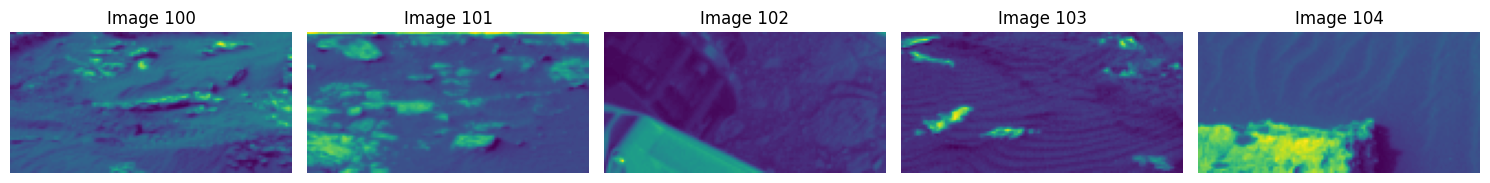

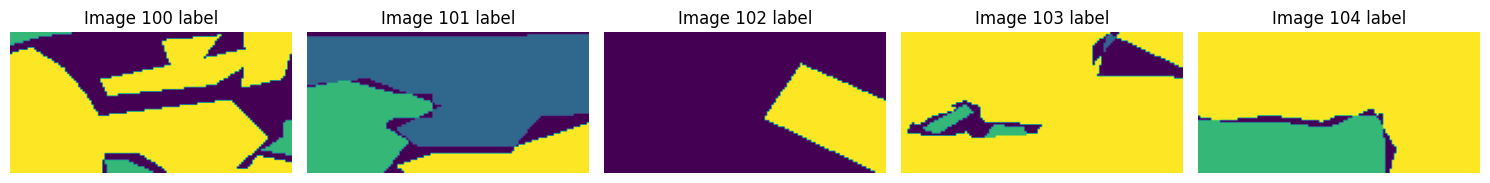

In [5]:
col_number = 5
num_images = 5
index_offset = 100

# Representing the images
for col_start in range(0, num_images, col_number):
    fig, axes = plt.subplots(1, col_number, figsize=(15, 5))
    for i, ax in enumerate(axes):
        img_idx = col_start + i + index_offset
        if img_idx >= len(X_train):
            break
        ax.imshow(X_train[img_idx]/4)
        ax.axis('off')
        ax.set_title(f"Image {img_idx}")
    plt.tight_layout()
    plt.show()

# Representing the images labels
for col_start in range(0, num_images, col_number):
    fig, axes = plt.subplots(1, col_number, figsize=(15, 5))
    for i, ax in enumerate(axes):
        img_idx = col_start + i + index_offset
        if img_idx >= len(y_train):
            break
        ax.imshow(y_train[img_idx]/4)
        ax.axis('off')
        ax.set_title(f"Image {img_idx} label")
    plt.tight_layout()
    plt.show()

## Let's see how many duplicates exist

In [6]:
unique_images, nbr_occurences = np.unique(y_train, axis=0, return_counts=1)
print("In total, {} unique images were found, for a total of {} images.".format(len(unique_images), y_train.shape[0]))

In total, 1788 unique images were found, for a total of 2615 images.


There are 39 images with duplicates in the dataset.
Here is the count for each of these : 
 - Image with duplicates 0 : 7 times in dataset


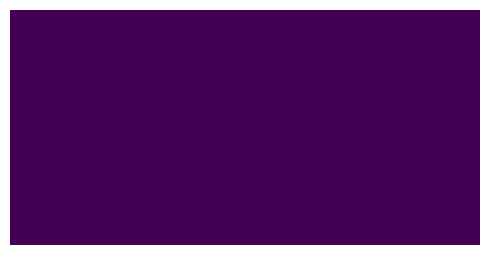

 - Image with duplicates 1 : 110 times in dataset


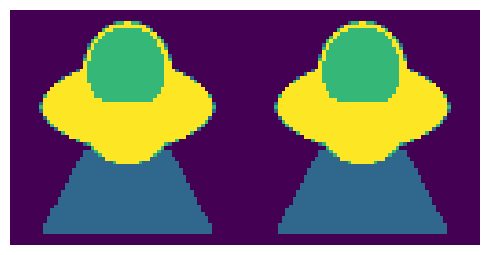

 - Image with duplicates 2 : 4 times in dataset


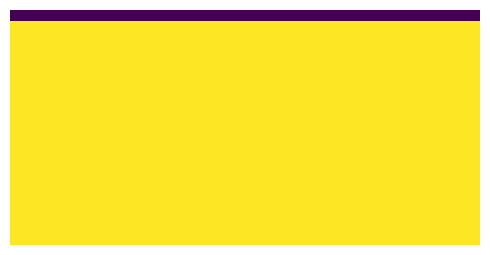

 - Image with duplicates 3 : 6 times in dataset


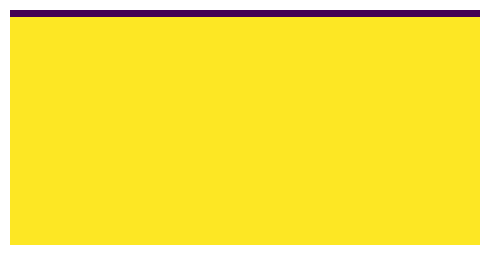

 - Image with duplicates 4 : 2 times in dataset


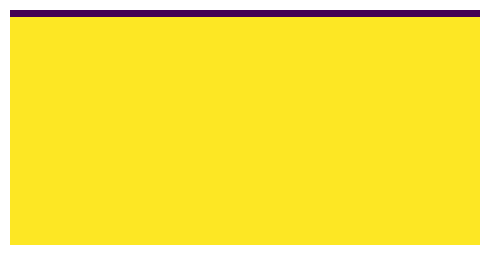

 - Image with duplicates 5 : 4 times in dataset


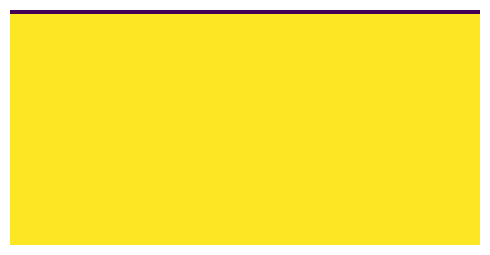

 - Image with duplicates 6 : 4 times in dataset


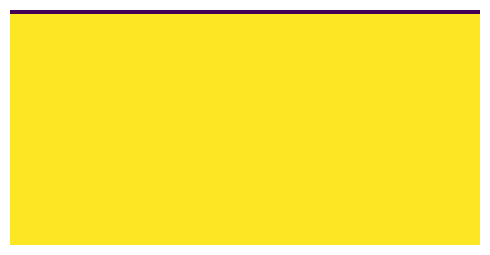

 - Image with duplicates 7 : 2 times in dataset


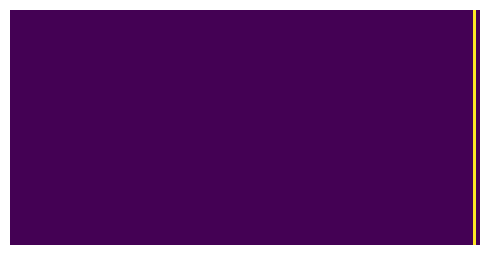

 - Image with duplicates 8 : 3 times in dataset


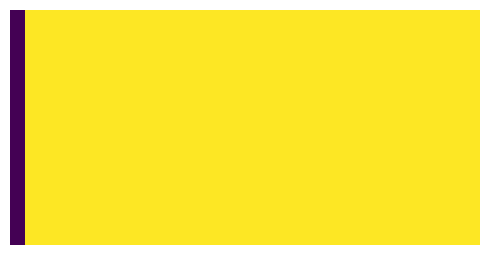

 - Image with duplicates 9 : 2 times in dataset


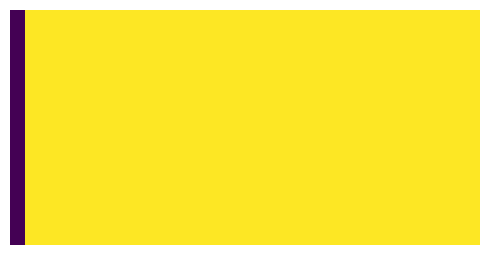

 - Image with duplicates 10 : 9 times in dataset


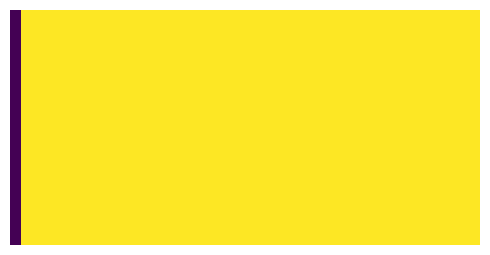

 - Image with duplicates 11 : 3 times in dataset


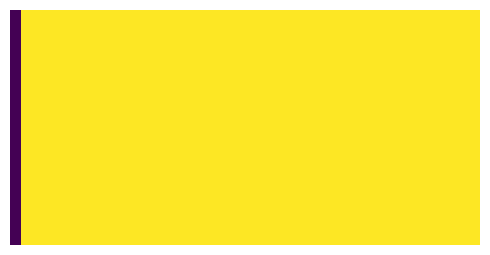

 - Image with duplicates 12 : 2 times in dataset


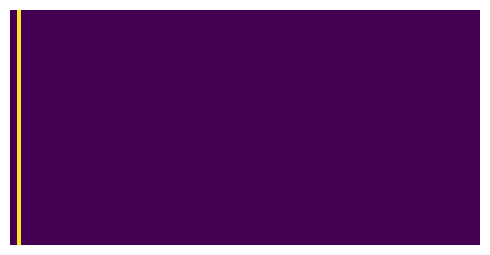

 - Image with duplicates 13 : 3 times in dataset


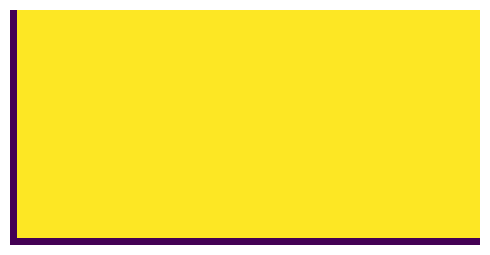

 - Image with duplicates 14 : 28 times in dataset


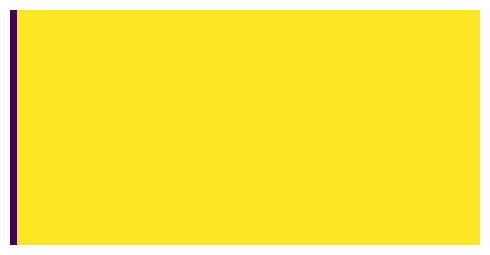

 - Image with duplicates 15 : 15 times in dataset


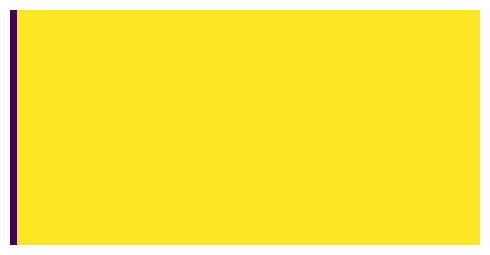

 - Image with duplicates 16 : 7 times in dataset


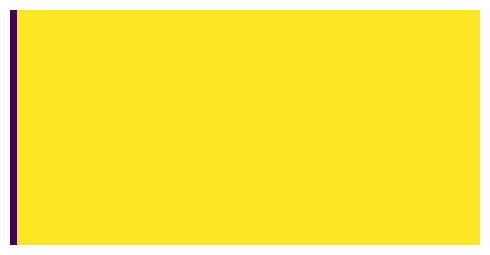

 - Image with duplicates 17 : 49 times in dataset


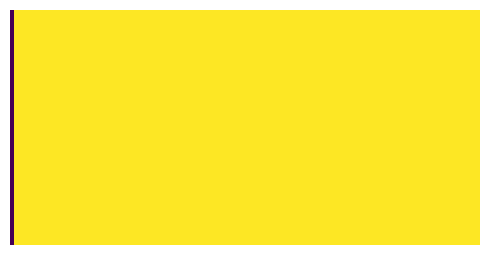

 - Image with duplicates 18 : 5 times in dataset


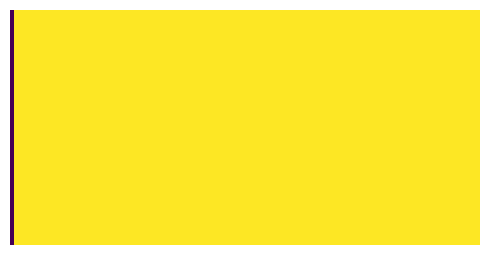

 - Image with duplicates 19 : 26 times in dataset


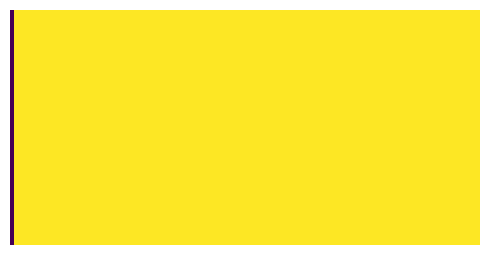

 - Image with duplicates 20 : 9 times in dataset


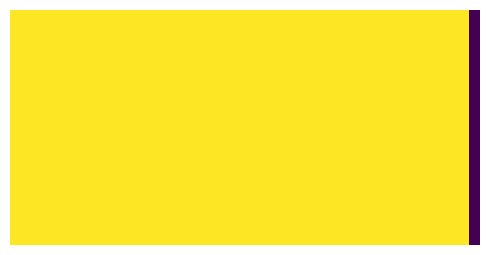

 - Image with duplicates 21 : 24 times in dataset


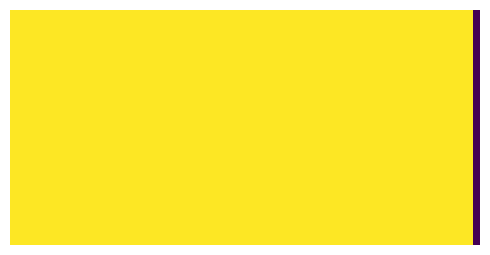

 - Image with duplicates 22 : 2 times in dataset


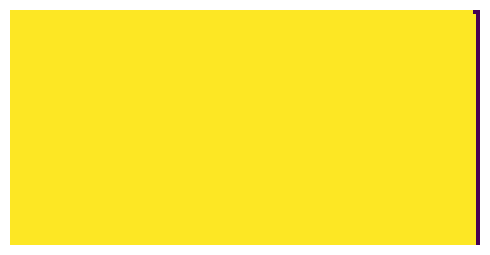

 - Image with duplicates 23 : 3 times in dataset


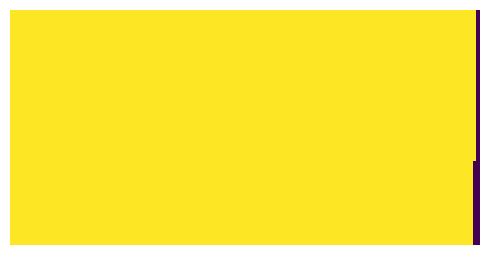

 - Image with duplicates 24 : 40 times in dataset


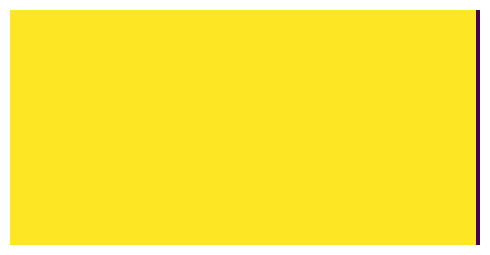

 - Image with duplicates 25 : 9 times in dataset


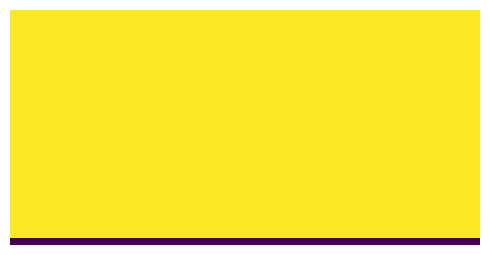

 - Image with duplicates 26 : 10 times in dataset


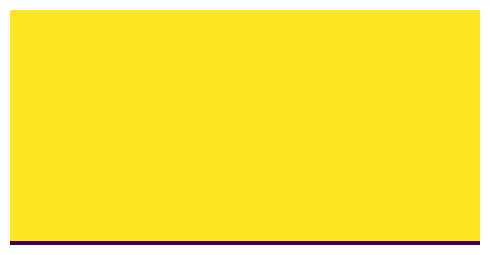

 - Image with duplicates 27 : 235 times in dataset


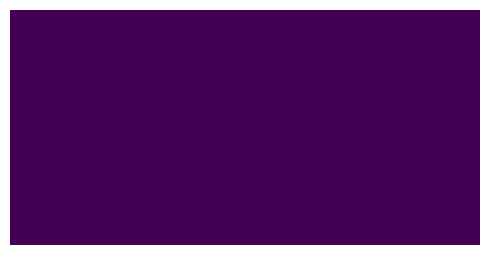

 - Image with duplicates 28 : 2 times in dataset


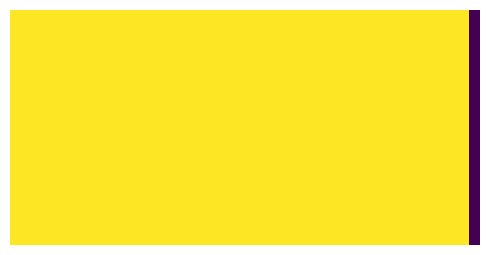

 - Image with duplicates 29 : 10 times in dataset


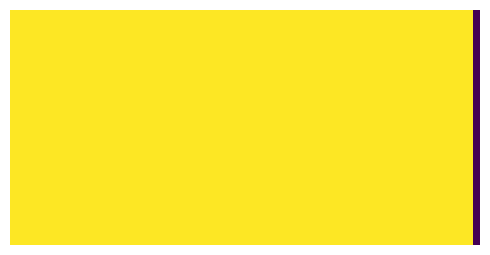

 - Image with duplicates 30 : 13 times in dataset


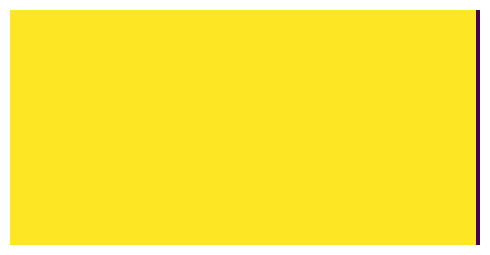

 - Image with duplicates 31 : 2 times in dataset


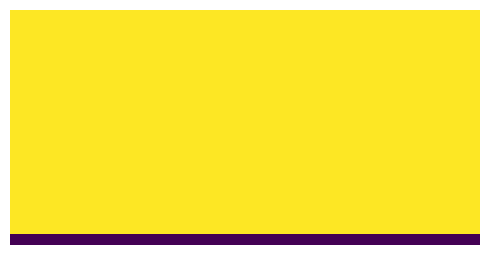

 - Image with duplicates 32 : 4 times in dataset


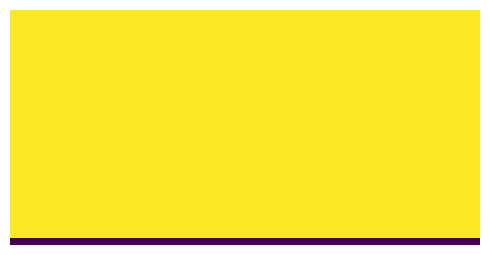

 - Image with duplicates 33 : 88 times in dataset


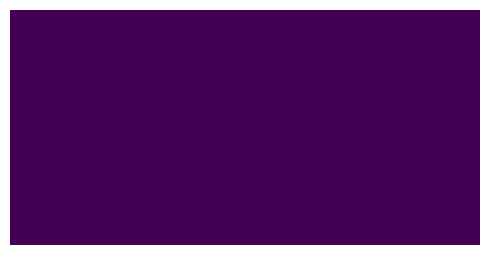

 - Image with duplicates 34 : 2 times in dataset


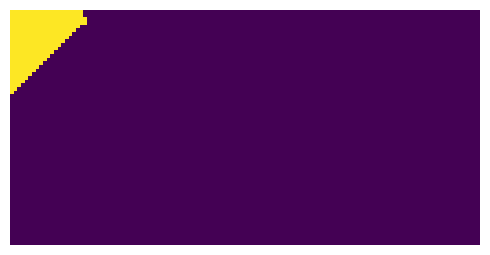

 - Image with duplicates 35 : 15 times in dataset


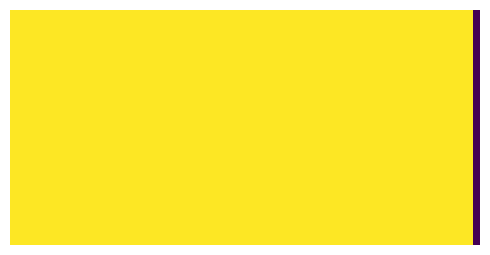

 - Image with duplicates 36 : 10 times in dataset


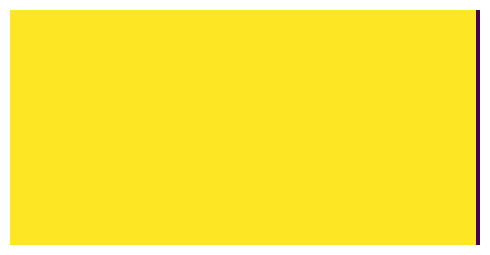

 - Image with duplicates 37 : 2 times in dataset


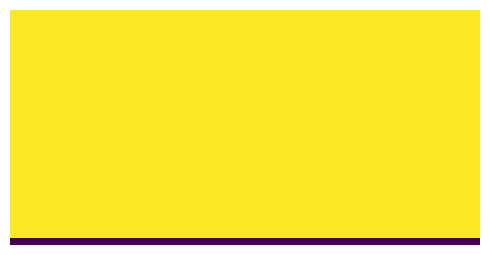

 - Image with duplicates 38 : 95 times in dataset


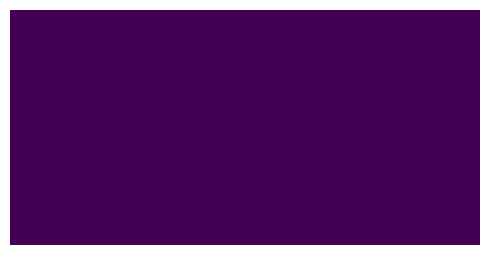

In [7]:
# Finding all images with count > 1 (more than once in the dataset)
unique_images_with_duplicates = np.where(nbr_occurences > 1)
number_of_images_with_duplicates = len(unique_images_with_duplicates[0])
duplicates_indexes = []
duplicates_labels = []
print("There are {} images with duplicates in the dataset.".format(number_of_images_with_duplicates))
print("Here is the count for each of these : ")

# Display counts of duplicates per one of these images
for i in range(number_of_images_with_duplicates):
    image_occurences = nbr_occurences[unique_images_with_duplicates[0][i]]

    # Get the i-th image with duplicates
    image = unique_images[unique_images_with_duplicates[0][i]]

    print(" - Image with duplicates {} : {} times in dataset".format(
        i, image_occurences))


    # Display image with duplicates
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.imshow(np.clip(image, 0, 255))
    ax.axis('off')
    plt.tight_layout()
    plt.show()



## Observe more closely those classes

 - Image with duplicates 1 : 110 times in dataset
Here are the 110 indexes of the duplicates of this image : [  62   79  125  139  142  147  152  156  170  210  217  266  289  299
  313  339  348  365  412  417  426  450  461  536  552  669  675  741
  744  747  799  802  808  820  821  849  863  890  909  942  971 1005
 1057 1079 1082 1092 1095 1106 1119 1125 1177 1194 1224 1247 1248 1258
 1261 1262 1306 1324 1365 1370 1443 1449 1508 1509 1519 1551 1584 1588
 1628 1637 1693 1736 1767 1768 1782 1813 1816 1834 1889 1925 1942 1975
 1979 2000 2002 2086 2096 2110 2111 2151 2161 2222 2235 2239 2242 2301
 2307 2350 2361 2365 2372 2414 2453 2522 2535 2561 2609 2614]



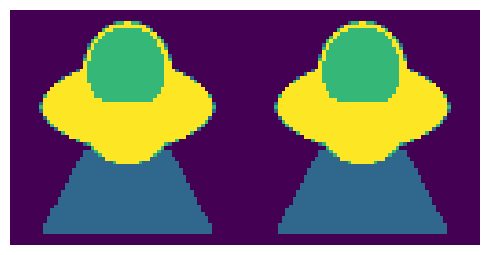

Now, let's get a look at each of these duplicates : 


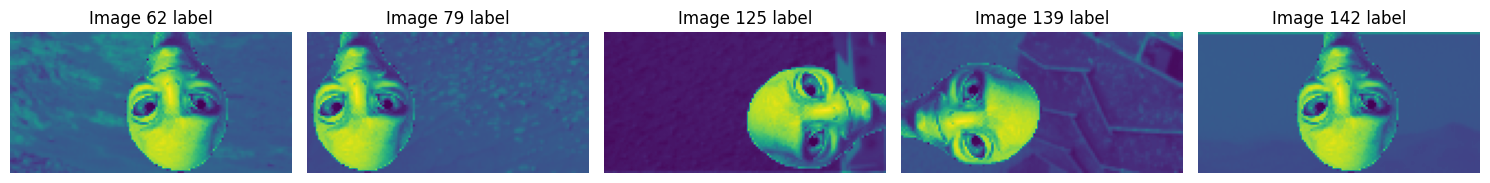

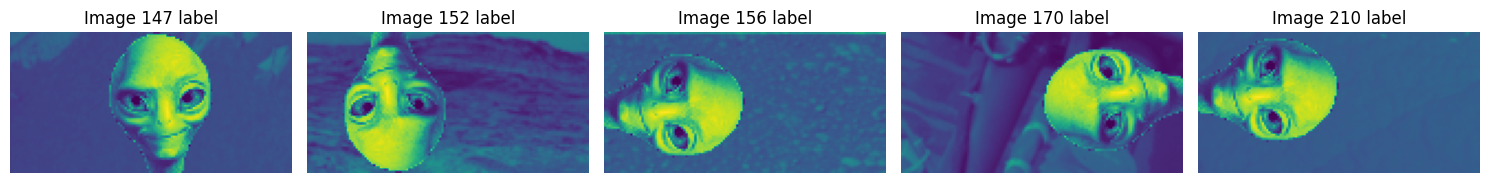

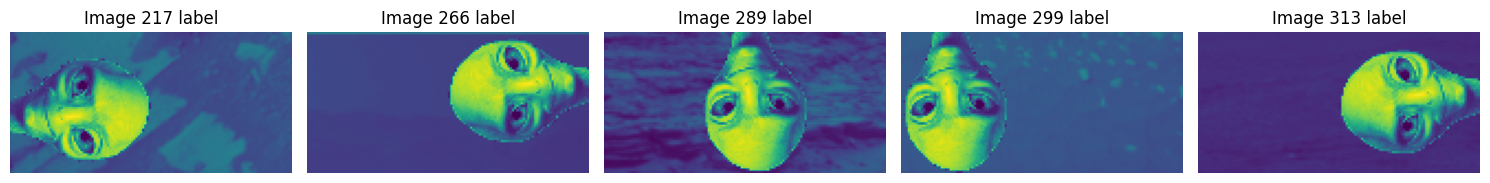

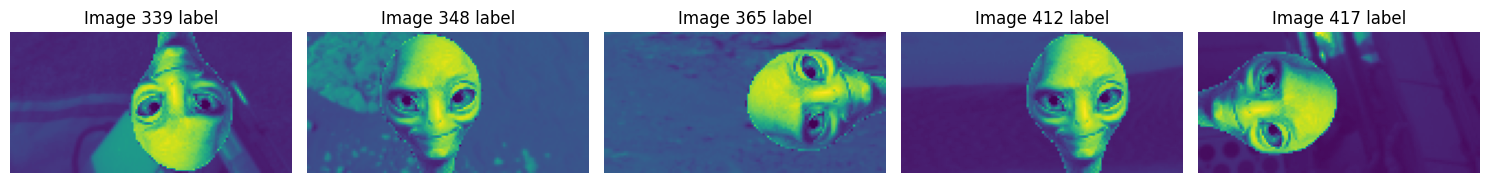

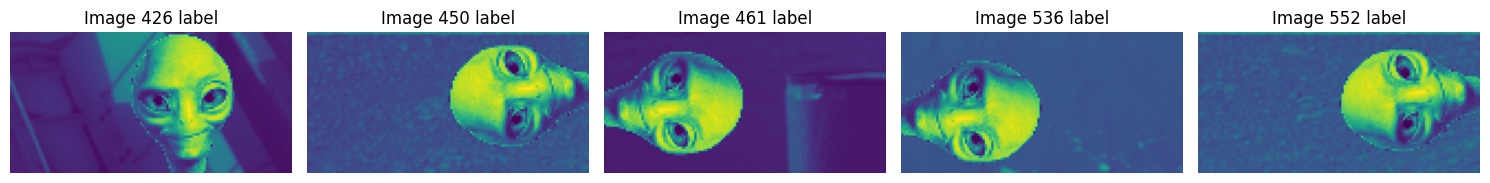

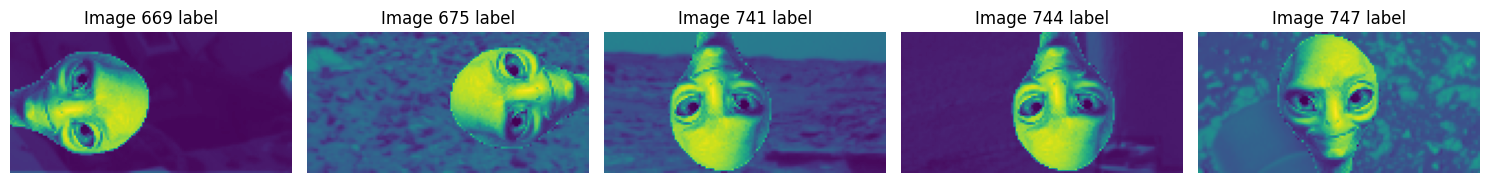

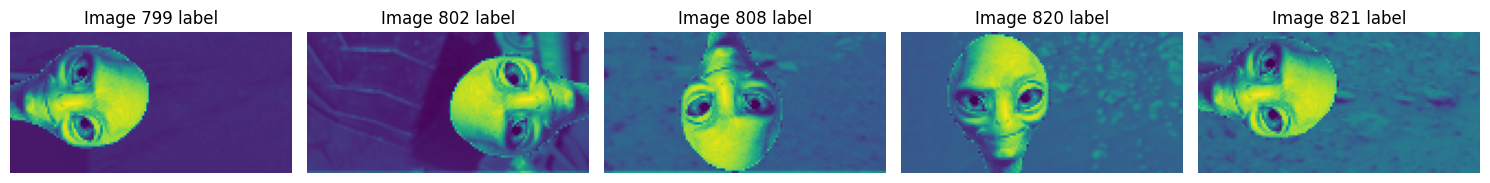

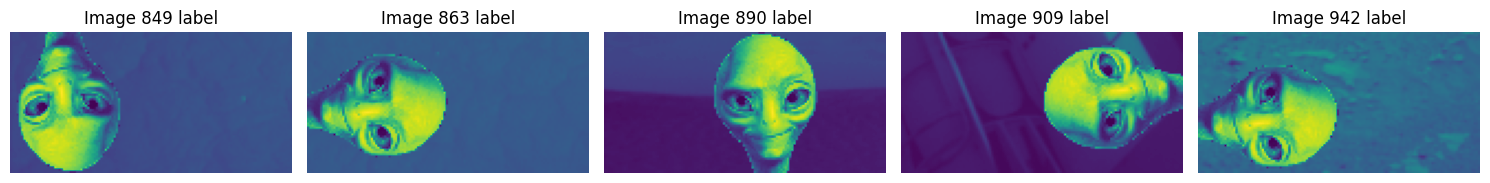

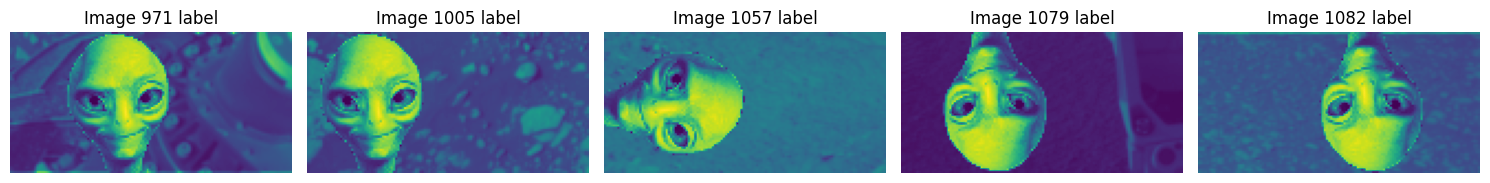

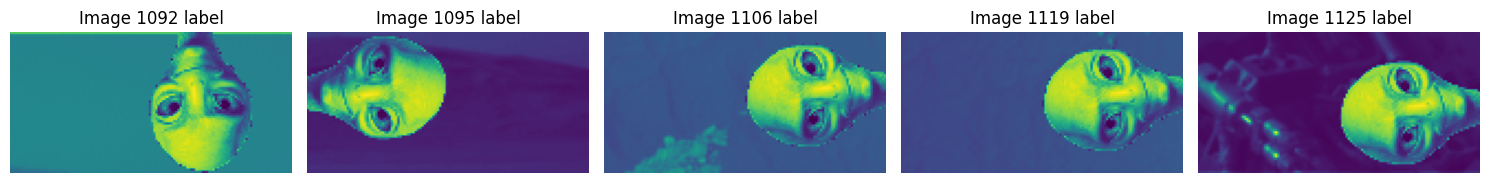

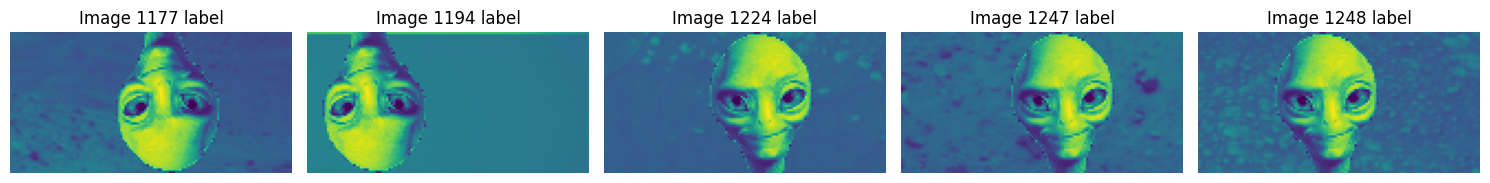

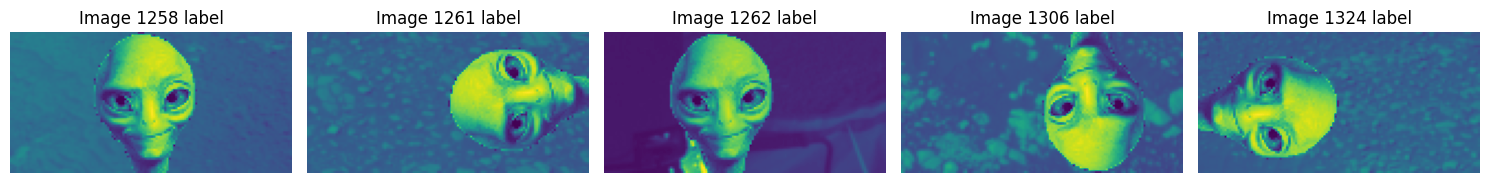

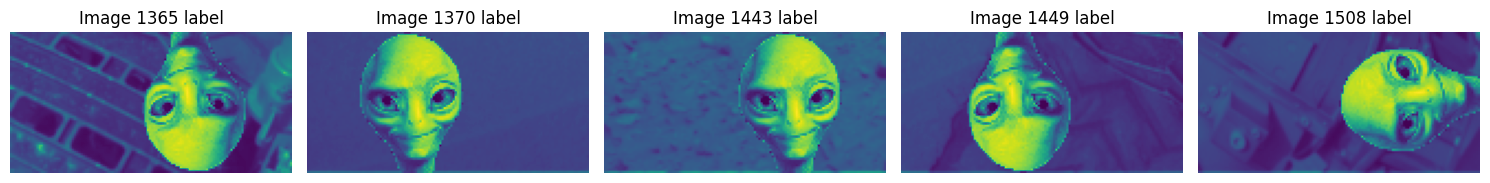

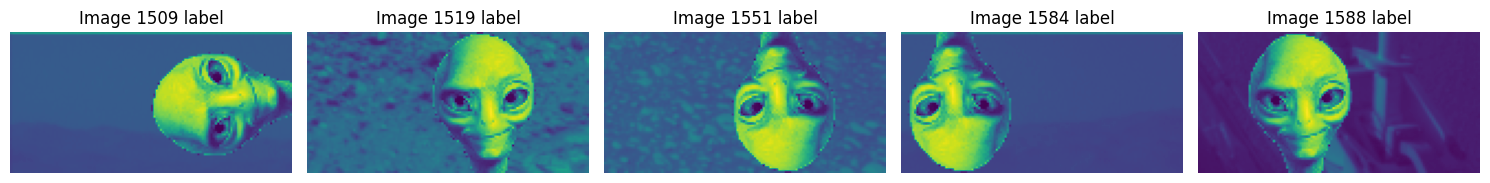

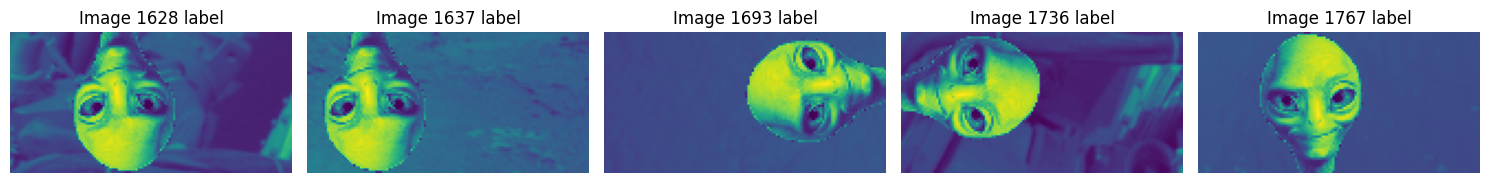

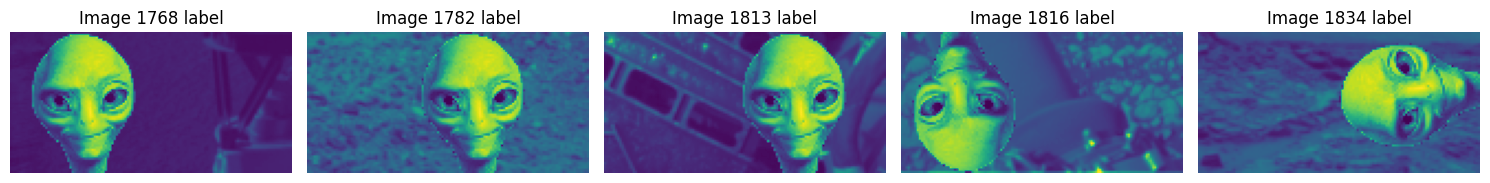

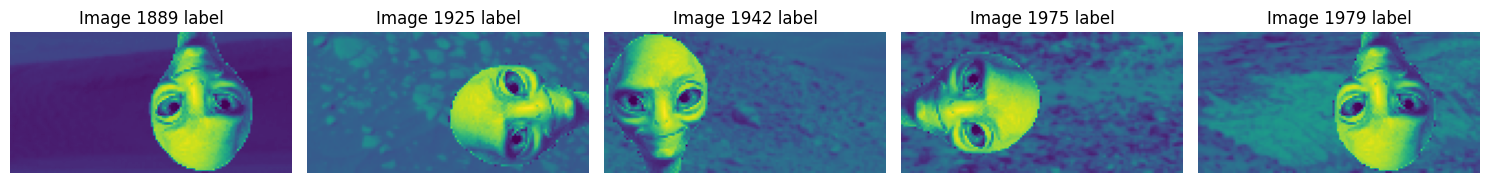

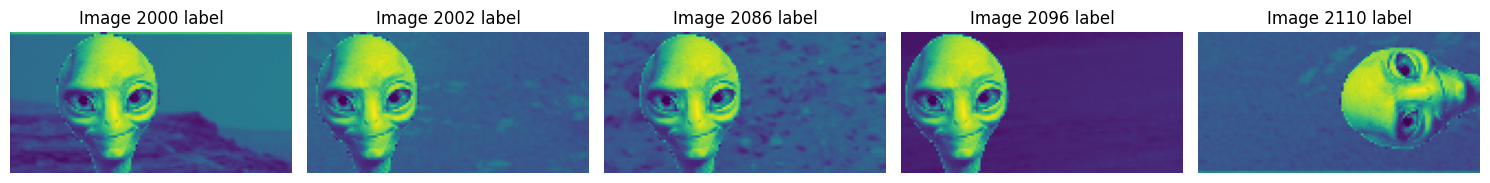

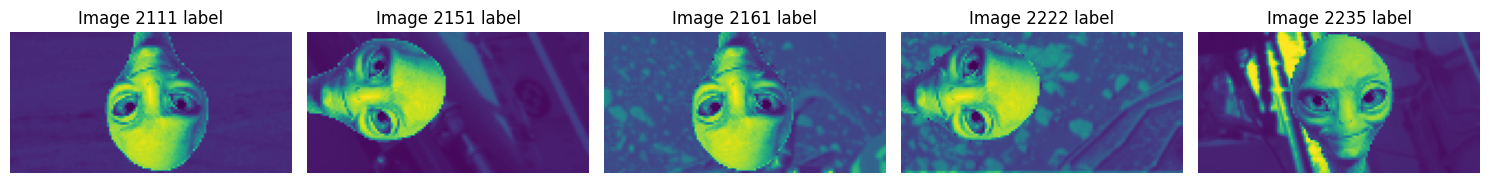

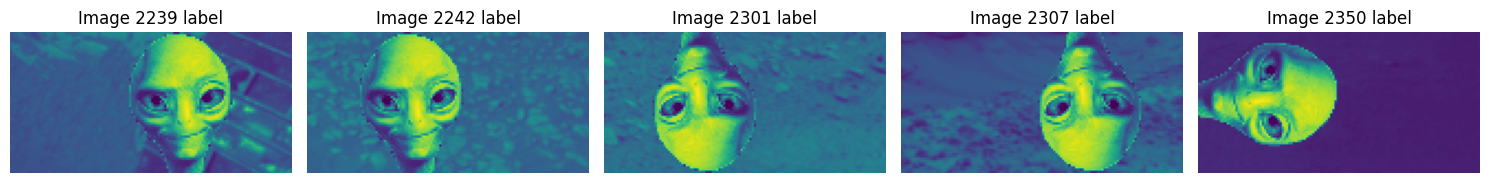

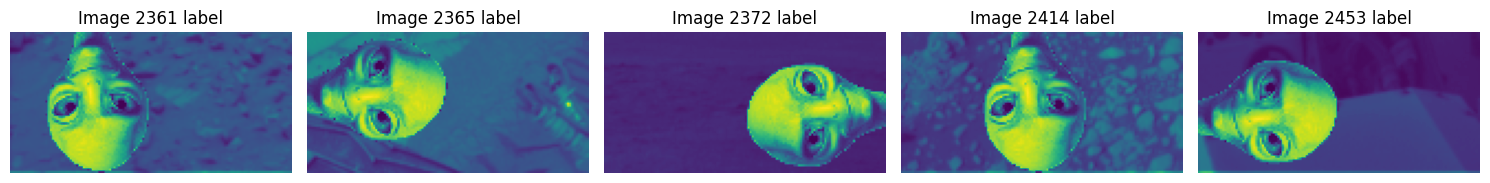

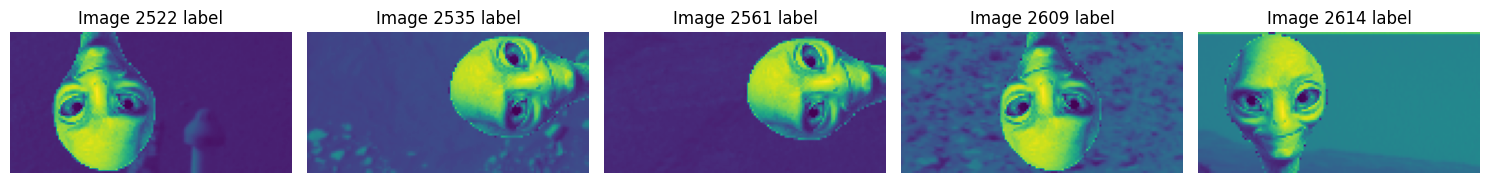

In [8]:
# Choosing the class of duplicates to observe
class_observed = 1

image_occurences = nbr_occurences[unique_images_with_duplicates[0][class_observed]]

# Get the i-th image with duplicates
image = unique_images[unique_images_with_duplicates[0][class_observed]]

# Get the list of indexes of these duplicates
duplicates_indexes = np.where(np.all(y_train == image, axis=(1, 2)))[0]

print(" - Image with duplicates {} : {} times in dataset".format(class_observed, image_occurences))
print("Here are the {} indexes of the duplicates of this image : {}".format(image_occurences, duplicates_indexes) + "\n")

# Display image with duplicates
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.imshow(np.clip(image, 0, 255))
ax.axis('off')
plt.tight_layout()
plt.show()

print("Now, let's get a look at each of these duplicates : ")

# Showing each of those images
num_cols = 5
for batch_start in range(0, image_occurences, num_cols):
    fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))
    for i, ax in enumerate(axes):
        if batch_start+i >= image_occurences:
            break
        duplicate_index = duplicates_indexes[batch_start+i]
        ax.imshow(X_train[duplicate_index]/4)
        ax.axis('off')
        ax.set_title(f"Image {duplicate_index} label")
    plt.tight_layout()
    plt.show()


## Noting down all the classes to delete

In [9]:
# Getting the classes to delete from the dataset
classes_to_delete = [1]

# Keeping in mind the classes with weird pictures (like shadows, robot parts...)
classes_with_weird_images = [0, 20, 21, 23, 27, 33, 34, 38]

## Actually noting down all the indexes to delete, and creating a V1 of the training dataset

In [10]:
# Getting rid of the classes to delete
indexes_to_delete = np.where(np.all(y_train == image, axis=(1, 2)))[0]

# getting rid of the duplicate images
new_X_train = np.delete(X_train, indexes_to_delete, axis=0)
new_y_train = np.delete(y_train, indexes_to_delete, axis=0)

# Expand the last dimension of each array
expanded_new_X_train = np.expand_dims(new_X_train, axis=1)
expanded_new_y_train = np.expand_dims(new_y_train, axis=1)

# Concatenate along the last axis
new_training_set = np.concatenate((expanded_new_X_train, expanded_new_y_train), axis=1)

print(expanded_new_X_train.shape, expanded_new_y_train.shape)
print(new_training_set.shape)

(2505, 1, 64, 128) (2505, 1, 64, 128)
(2505, 2, 64, 128)


In [11]:
# Save both arrays in new .npz file
np.savez_compressed("data/mars_for_students_V1.npz", training_set=new_training_set, test_set=X_test)